In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("F:\Data Science\Kaggle Data Sets\Diamonds Prices2022.csv")

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [4]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [5]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [6]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [7]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [8]:
df['cut'].value_counts()

Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64

In [9]:
df['color'].value_counts()

G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [10]:
df['clarity'].value_counts()

SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [12]:
df['cut']=label_encoder.fit_transform(df['cut'])
df['color']=label_encoder.fit_transform(df['color'])
df['clarity']=label_encoder.fit_transform(df['clarity'])

In [13]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,2,0,3,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,3,1,2,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,3,2,2,59.8,62.0,2756,5.74,5.73,3.43


<AxesSubplot:>

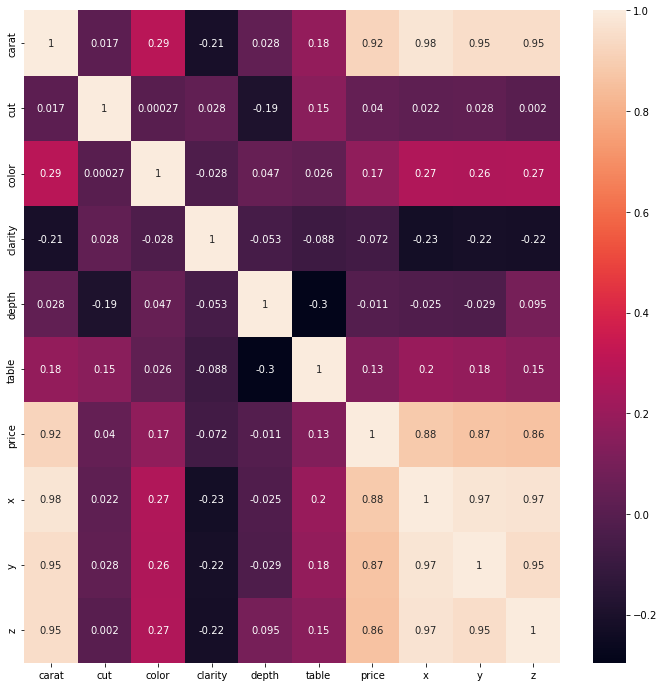

In [14]:
corrmat=df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,annot=True)

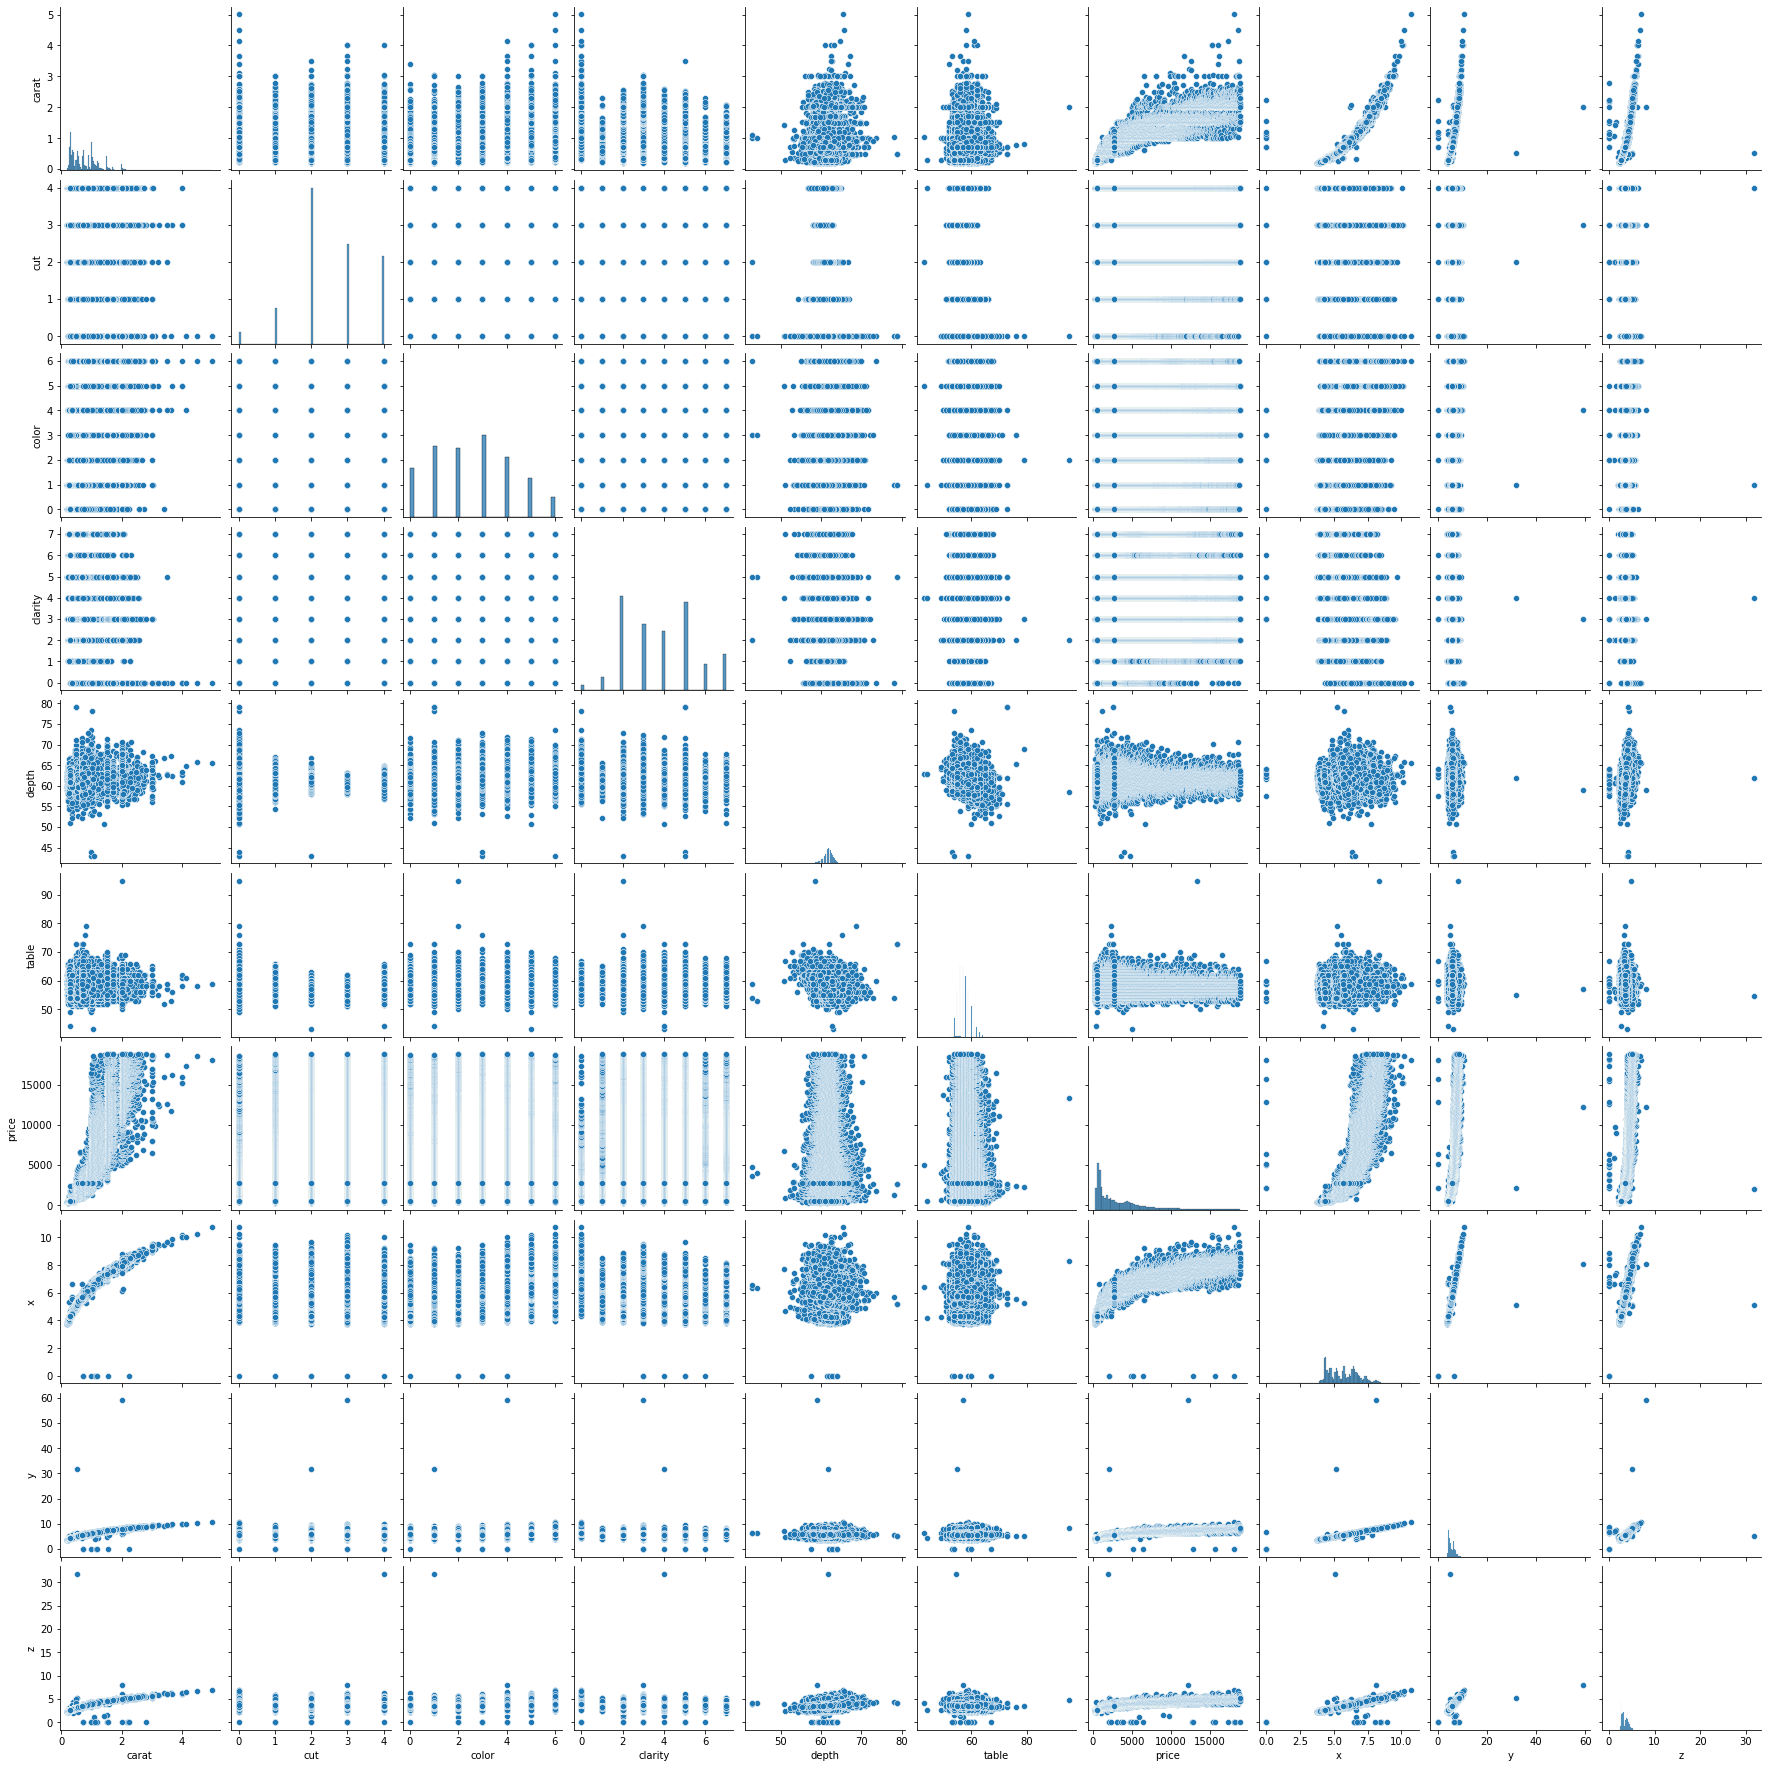

In [15]:
sns.pairplot(df)
plt.show()

In [16]:
df.quantile(0.25)

carat        0.40
cut          2.00
color        1.00
clarity      2.00
depth       61.00
table       56.00
price      950.00
x            4.71
y            4.72
z            2.91
Name: 0.25, dtype: float64

In [17]:
df.quantile(0.75)

carat         1.04
cut           3.00
color         4.00
clarity       5.00
depth        62.50
table        59.00
price      5324.00
x             6.54
y             6.54
z             4.04
Name: 0.75, dtype: float64

In [18]:
len(df)

53943

In [19]:
def remove_outlier_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    df_final=df[((df<(q1-1.5*iqr)) |(df>(q3+1.5*iqr)))]
    return df_final
     
    

In [20]:
price_removed=remove_outlier_IQR(df.price)
price_removed

23820    11886
23821    11886
23822    11888
23823    11888
23824    11888
         ...  
27745    18803
27746    18804
27747    18806
27748    18818
27749    18823
Name: price, Length: 3540, dtype: int64

In [21]:
len(price_removed)

3540

In [22]:
df_price_removed=pd.DataFrame(price_removed)
for i in df_price_removed.index:
        df.drop(index=i,inplace=True)

In [23]:
len(df)

50403

In [24]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,2,0,3,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,3,1,2,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,3,2,2,59.8,62.0,2756,5.74,5.73,3.43


In [25]:
depth_removed=remove_outlier_IQR(df.depth)
depth_removed

2        56.9
8        65.1
24       58.1
35       58.2
42       65.2
         ... 
53882    65.4
53886    58.0
53890    57.9
53895    57.8
53927    58.1
Name: depth, Length: 2766, dtype: float64

In [26]:
len(depth_removed)

2766

In [27]:
df_depth_removed=pd.DataFrame(depth_removed)
for i in df_depth_removed.index:
        df.drop(index=i,inplace=True)

In [28]:
len(df)

47637

In [29]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,2,0,3,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,3,1,2,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,3,2,2,59.8,62.0,2756,5.74,5.73,3.43
